In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from math import sqrt

In [2]:
# 한글 처리
font_name = font_manager.FontProperties(fname='/System/Library/Fonts/Supplemental/AppleGothic.ttf') \
                .get_name()
rc('font', family=font_name)

In [3]:
ratings = {
    'user1': {'captain marvel':5, 'last mission':4, 'money':2},
    'user2': {'captain marvel':4, 'last mission':2, 'money':1},
    'me': {'last mission':4, 'money':3},
    'user3': {'captain marvel':3.5, 'last mission':4, 'money':4}
}

In [4]:
ratings['me']

{'last mission': 4, 'money': 3}

In [5]:
ratings['me']['money']

3

In [6]:
def similarity(i, j):
    return sqrt(pow(i, 2) + pow(j ,2))

In [7]:
var1 = ratings['me']['last mission'] - ratings['user3']['last mission']
var2 = ratings['me']['money'] - ratings['user3']['money']
similarity(var1, var2)

1.0

In [8]:
for i in ratings: 
    if i != 'me':
        var1 = ratings['me']['last mission'] - ratings[i]['last mission']
        var2 = ratings['me']['money'] - ratings[i]['money']
        print(f"{i}:{similarity(var1, var2)}")

user1:1.0
user2:2.8284271247461903
user3:1.0


In [9]:
# 정규화 (0~1) 0: 거리가 먼 데이터, 1: 거리가 가까운 데이터
for i in ratings: 
    if i != 'me':
        var1 = ratings['me']['last mission'] - ratings[i]['last mission']
        var2 = ratings['me']['money'] - ratings[i]['money']
        print(f"{i}:{ 1 / (1 + similarity(var1, var2))}")

user1:0.5
user2:0.2612038749637414
user3:0.5


In [10]:
# 다찬원 유사도 구하기
def similarity_distance(data, name1, name2):
    sum = 0
    for i in data[name1]:
        if i in data[name2]: # 같은 영화를 밨다면 
            # 각 축을 기준으로 차이를 구하고 제곱하을 하고, 총합의 제곱근의 거리 점수 
            sum += pow(data[name1][i] - data[name2][i], 2)
    
    # 유사할수록 더 높은 값을 가지는 계산식 사용, 결과 값이 0과 1사이의 값으로 변환
    # 반환 값이 1에 가까울 수록 유사도가 높다
    return 1 / (1 + sqrt(sum))

In [11]:
similarity_distance(ratings, 'user1', 'user2')

0.28989794855663564

In [12]:
similarity_distance(ratings, 'user1', 'user3')

0.2857142857142857

In [13]:
# 전체 데이터에서 유사도가 가장 가까운 사람 구하기 
def nearest_user(data, name, index=3):
    nearest_user_list = []
    for u in data:
        if name != u: #자기 자신은 제외 
            nearest_user_list.append((similarity_distance(data, name, u), u))
    
    nearest_user_list.sort() # 오름차순 정렬
    nearest_user_list.reverse() # 내림차순 정렬
    
    return nearest_user_list[:index]

In [14]:
nearest_user(ratings, 'user2')

[(0.28989794855663564, 'user1'),
 (0.2612038749637414, 'me'),
 (0.21551468935838852, 'user3')]

In [15]:
nearest_user(ratings, 'user2')

[(0.5, 'me'), (0.28989794855663564, 'user2'), (0.2857142857142857, 'user3')]

In [19]:
# 평점과 이름 분리 
def nearest_user(data, name, index=3):
    scores = []
    names = []
    for u in data:
        if name != u: #자기 자신은 제외 
            scores.append(similarity_distance(data, name, u))
            names.append(u)
    
    scores.sort()
    scores.reverse()
    names.sort()
    names.reverse()
    
    return scores, names 

In [20]:
scores, names = nearest_user(ratings, 'user2')
print(scores)
print(names)

[0.28989794855663564, 0.2612038749637414, 0.21551468935838852]
['user3', 'user1', 'me']


In [21]:
# 시각화
def draw_chart(data, labels):
    positions = range(len(data))
    plt.barh(positions, data, height=0.5, color='b')
    plt.yticks(positions, labels)
    plt.xlabel('Similarity')
    plt.ylabel('Name')
    plt.show()

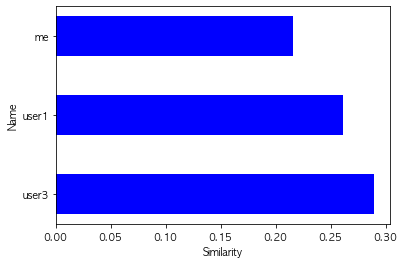

In [23]:
draw_chart(scores, names)